In [5]:
import numpy as np
import pandas as pd

centroids = pd.read_csv('Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv')
orientations = np.zeros((centroids.shape[0], 3))

In [9]:
for index, row in centroids.iterrows():
    centroid = np.array([row['R'], row['A'], row['S']])
    norm = centroid / np.sqrt(centroid[0]**2 + centroid[1]**2 + centroid[2]**2)
    orientations[index] = norm 

np.save('orientations.npy', orientations)

Generate plot of normals for each centroid for report

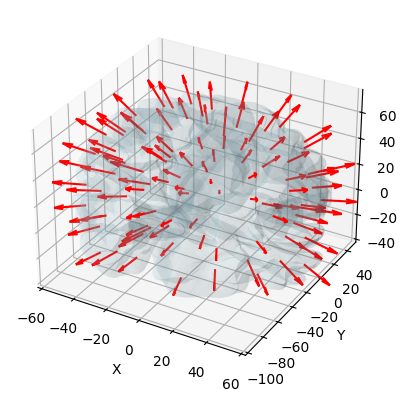

In [8]:
from nilearn import plotting, datasets, surface
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fetch the fsaverage5 surface dataset
fsaverage = datasets.fetch_surf_fsaverage()

# Load the mesh and texture data
mesh_right = surface.load_surf_mesh(fsaverage['pial_right'])
mesh_left = surface.load_surf_mesh(fsaverage['pial_left'])

# Create a figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the brain surfaces

ax.plot_trisurf(mesh_left[0][:, 0], mesh_left[0][:, 1], mesh_left[0][:, 2],
                triangles=mesh_left[1], color='lightblue', alpha=0.1, edgecolor='none')

ax.plot_trisurf(mesh_right[0][:, 0], mesh_right[0][:, 1], mesh_right[0][:, 2],
                triangles=mesh_right[1], color='lightblue', alpha=0.1, edgecolor='none')

for index, row in centroids.iterrows():
    centroid = np.array([row['R'], row['A'], row['S']])
    norm = centroid / np.sqrt(centroid[0]**2 + centroid[1]**2 + centroid[2]**2)
    arrow_start = centroid
    arrow_end = arrow_start + norm

    ax.quiver(arrow_start[0], arrow_start[1], arrow_start[2],
          norm[0], norm[1], norm[2],
          color='r', length=20)
    
ax.set_xlim([-60, 60])
ax.set_ylim([-100, 50])
ax.set_zlim([-40, 75])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()